In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.5 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import  xarray as xr
import pandas as pd
# import xcdat
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title File check
import os
from tqdm.auto import tqdm
directory_path='/content/drive/MyDrive/AP_HW/Scripts-ll/WBT/wbt_files'
length=len(sorted(os.listdir(directory_path)))
print('number of files:',length)
for filename in tqdm(sorted(os.listdir(directory_path))):
  if filename.endswith('.nc'):
    file_path=os.path.join(directory_path,filename)
    ds=xr.open_dataset(file_path)
    year=str(ds.time.dt.year.values[1])
    length=len(sorted(os.listdir(directory_path)))
    file_year=filename[-7:-3]
    if file_year!=year: print(filename)

number of files: 54


  0%|          | 0/54 [00:00<?, ?it/s]

## Max ept

In [ ]:
ept=xr.open_mfdataset('/content/drive/MyDrive/AP_HW/ERA5 Data/EPT/ept-2023.nc')
ept

<xarray.Dataset> Size: 32MB
Dimensions:    (time: 8760, latitude: 24, longitude: 19)
Coordinates:
  * time       (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Data variables:
    ept        (time, latitude, longitude) float64 32MB dask.array<chunksize=(8760, 24, 19), meta=np.ndarray>

In [ ]:
ds=xr.open_mfdataset('/content/drive/MyDrive/AP_HW/ERA5 Data/EPT/*.nc')
lat_range=slice(26.5,20.75)
lon_range=slice(88,92.5)
ds_ept=ds.ept.sel(latitude=lat_range,longitude=lon_range)
ds_ept_bdt=ds_ept.shift(time=6)
ds_ept_bdt

<xarray.DataArray 'ept' (time: 473376, latitude: 24, longitude: 19)> Size: 2GB
dask.array<rechunk-merge, shape=(473376, 24, 19), dtype=float64, chunksize=(8784, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 4MB 1971-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Attributes:
    units:      K
    long_name:  Equivalent potential temperature

In [ ]:
ds_ept_C=ds_ept_bdt-273.15
ds_ept_C=ds_ept_C.assign_attrs(ds_ept_bdt.attrs)
ds_ept_C.attrs['units']= '° C'

In [ ]:
ept_daily_max=ds_ept_C.resample(time='D').max()
ept_daily_max

<xarray.DataArray 'ept' (time: 19724, latitude: 24, longitude: 19)> Size: 72MB
dask.array<stack, shape=(19724, 24, 19), dtype=float64, chunksize=(1, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 158kB 1971-01-01 1971-01-02 ... 2024-12-31
Attributes:
    units:      ° C
    long_name:  Equivalent potential temperature

In [ ]:
monthly_ept = ept_daily_max.resample(time='M').mean(dim='time', skipna=True)
monthly_ept

<xarray.DataArray 'ept' (time: 648, latitude: 24, longitude: 19)> Size: 2MB
dask.array<stack, shape=(648, 24, 19), dtype=float64, chunksize=(1, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 5kB 1971-01-31 1971-02-28 ... 2024-12-31
Attributes:
    units:      ° C
    long_name:  Equivalent potential temperature

In [ ]:
monthly_ept

<xarray.DataArray 'ept' (time: 648, latitude: 24, longitude: 19)> Size: 2MB
dask.array<stack, shape=(648, 24, 19), dtype=float64, chunksize=(1, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 5kB 1971-01-31 1971-02-28 ... 2024-12-31
Attributes:
    units:      ° C
    long_name:  Equivalent potential temperature

In [ ]:
weights=np.cos(np.deg2rad(monthly_ept.latitude))
weights.name='weights'
monthly_ept_weighted = monthly_ept.weighted(weights)
BD_mean_ept = monthly_ept_weighted.mean(['longitude','latitude'])
BD_mean_ept

<xarray.DataArray 'ept' (time: 648)> Size: 5kB
dask.array<truediv, shape=(648,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 5kB 1971-01-31 1971-02-28 ... 2024-12-31

In [ ]:
# creating copy and making dataframe
ept_df=BD_mean_ept.to_dataframe()
ept_df=ept_df.reset_index()

# Adding necessary columns
ept_df['time']=pd.to_datetime(ept_df['time'])
ept_df['month']=ept_df['time'].dt.month
ept_df['year']=ept_df['time'].dt.year

# month to season
custom_season_mapping = {
    1: 'DJF',
    2: 'DJF',
    3: 'MAM',
    4: 'MAM',
    5: 'MAM',
    6: 'JJAS',
    7: 'JJAS',
    8: 'JJAS',
    9: 'JJAS',
    10: 'ON',
    11: 'ON',
    12: 'DJF'
}

# creating season column
ept_df['season']=ept_df['month'].map(custom_season_mapping)
# Separating DJF from others.
ept_df_1=ept_df[(ept_df['month']<=2)|(ept_df['month']>=12)]
ept_df_2=ept_df[(ept_df['month']>=3)&(ept_df['month']<=11)]

# performing groupby to get seasonal mean.
ept_seasonal=ept_df_2.groupby(['year','season'])['ept'].mean().reset_index()

# Mapping dictionary
season_mapping = {'DJF': 1, 'MAM': 2, 'JJAS': 3, 'ON': 4}

# Assign numerical values to a each season
ept_seasonal['numeric_season'] = ept_seasonal['season'].map(season_mapping)

# Sorting
all_season_ept=ept_seasonal.sort_values(by=['year','numeric_season'],ascending=[True,True])
all_season_ept=all_season_ept.reset_index(drop=True)
all_season_ept
all_season_ept.to_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/all_season_ept.csv',index=False)


## Max t2m calculation

In [ ]:
# commented so it doesn't run. It takes a lot of time.
# import os
# from tqdm.auto import tqdm
# directory_path='/content/drive/MyDrive/AP_HW/ERA5 Data/t2m_d2m_sp'

# t2m_list=[]
# for filename in tqdm(sorted(os.listdir(directory_path))):
#   if filename.endswith('.nc'):
#     filepath=os.path.join(directory_path,filename)
#     ds=xr.open_dataset(filepath)
#     year=int(filename[11:-3])
#     lat_range=slice(26.5,20.75)
#     lon_range=slice(88,92.5)
#     ds_t2m=ds.t2m.sel(latitude=lat_range,longitude=lon_range)
#     ds_t2m_bdt=ds_t2m.shift(time=6)
#     ds_t2m_C=ds_t2m_bdt-273.15
#     ds_t2m_C=ds_t2m_C.assign_attrs(ds_t2m.attrs)
#     ds_t2m_C.attrs['units']= '° C'
#     tmax_ds_daily=ds_t2m_C.resample(time='D').max()
#     t2m_list.append(tmax_ds_daily)
# max_t2m_no_mask=xr.concat(t2m_list,dim='time')
# max_t2m_no_mask.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_t2m_no_mask.nc')

In [ ]:
tmax_ds_daily=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_t2m_no_mask.nc')
tmax_ds_daily

<xarray.Dataset> Size: 72MB
Dimensions:    (time: 19724, latitude: 24, longitude: 19)
Coordinates:
  * time       (time) datetime64[ns] 158kB 1971-01-01 1971-01-02 ... 2024-12-31
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Data variables:
    t2m        (time, latitude, longitude) float64 72MB ...

In [ ]:
# monthly_tmax = tmax_ds_daily.resample(time='1M').mean(dim='time', skipna=True)
monthly_t2m = tmax_ds_daily.resample(time='M').mean(dim='time', skipna=True)
monthly_t2m

<xarray.Dataset> Size: 2MB
Dimensions:    (time: 648, latitude: 24, longitude: 19)
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 5kB 1971-01-31 1971-02-28 ... 2024-12-31
Data variables:
    t2m        (time, latitude, longitude) float64 2MB 23.43 23.54 ... 29.48

In [ ]:
weights_t2m=np.cos(np.deg2rad(monthly_t2m.latitude))
weights_t2m.name='weights'
monthly_t2m_weighted=monthly_t2m.weighted(weights)
BD_mean_t2m=monthly_t2m_weighted.mean(['longitude','latitude'])
BD_mean_t2m

<xarray.Dataset> Size: 10kB
Dimensions:  (time: 648)
Coordinates:
  * time     (time) datetime64[ns] 5kB 1971-01-31 1971-02-28 ... 2024-12-31
Data variables:
    t2m      (time) float64 5kB 23.76 26.02 30.9 28.52 ... 30.6 29.06 25.63

In [ ]:
# creating copy and making dataframe
t2m_df=BD_mean_t2m.to_dataframe()
t2m_df=t2m_df.reset_index()

# Adding necessary columns
t2m_df['time']=pd.to_datetime(t2m_df['time'])
t2m_df['month']=t2m_df['time'].dt.month
t2m_df['year']=t2m_df['time'].dt.year

# month to season
custom_season_mapping = {
    1: 'DJF',
    2: 'DJF',
    3: 'MAM',
    4: 'MAM',
    5: 'MAM',
    6: 'JJAS',
    7: 'JJAS',
    8: 'JJAS',
    9: 'JJAS',
    10: 'ON',
    11: 'ON',
    12: 'DJF'
}

# creating season column
t2m_df['season']=t2m_df['month'].map(custom_season_mapping)
# Separating DJF from others.
t2m_df_1=t2m_df[(t2m_df['month']<=2)|(t2m_df['month']>=12)]
t2m_df_2=t2m_df[(t2m_df['month']>=3)&(t2m_df['month']<=11)]

# performing groupby to get seasonal mean.
t2m_seasonal=t2m_df_2.groupby(['year','season'])['t2m'].mean().reset_index()

# Mapping dictionary
season_mapping = {'DJF': 1, 'MAM': 2, 'JJAS': 3, 'ON': 4}

# Assign numerical values to a each season
t2m_seasonal['numeric_season'] = t2m_seasonal['season'].map(season_mapping)

# Sorting
all_season_t2m=t2m_seasonal.sort_values(by=['year','numeric_season'],ascending=[True,True])
all_season_t2m=all_season_t2m.reset_index(drop=True)

all_season_t2m
all_season_t2m.to_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/all_season_t2m.csv',index=False)




#WBT

In [ ]:
wbts=xr.open_mfdataset('/content/drive/MyDrive/AP_HW/Scripts-ll/WBT/wbt_files/*.nc')
lat_range=slice(26.5,20.75)
lon_range=slice(88,92.5)
wbt_ds=wbts.wbt.sel(latitude=lat_range,longitude=lon_range)

In [ ]:
wbt_ds_C=wbt_ds-273.15
wbt_ds_C=wbt_ds_C.assign_attrs(wbt_ds.attrs)
wbt_ds_C.attrs['units']= '° C'
wbt_ds_C

<xarray.DataArray 'wbt' (time: 356400, latitude: 24, longitude: 19)> Size: 1GB
dask.array<sub, shape=(356400, 24, 19), dtype=float64, chunksize=(6600, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 3MB 1971-03-01 ... 2024-11-30T23:00:00
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Attributes:
    units:    ° C

In [ ]:
wbt_ds_daily=wbt_ds_C.resample(time='D').max()
wbt_ds_daily

<xarray.DataArray 'wbt' (time: 19634, latitude: 24, longitude: 19)> Size: 72MB
dask.array<where, shape=(19634, 24, 19), dtype=float64, chunksize=(1, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 157kB 1971-03-01 1971-03-02 ... 2024-11-30
Attributes:
    units:    ° C

In [ ]:
monthly_wbt = wbt_ds_daily.resample(time='M').mean(dim='time', skipna=True)
monthly_wbt

<xarray.DataArray 'wbt' (time: 645, latitude: 24, longitude: 19)> Size: 2MB
dask.array<stack, shape=(645, 24, 19), dtype=float64, chunksize=(1, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 5kB 1971-03-31 1971-04-30 ... 2024-11-30
Attributes:
    units:    ° C

In [ ]:
weights=np.cos(np.deg2rad(monthly_wbt.latitude))
weights.name='weights'
wbt_weighted = monthly_wbt.weighted(weights)
BD_mean_wbt= wbt_weighted.mean(['longitude','latitude'])
BD_mean_wbt

<xarray.DataArray 'wbt' (time: 645)> Size: 5kB
dask.array<truediv, shape=(645,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 5kB 1971-03-31 1971-04-30 ... 2024-11-30

In [ ]:
# creating copy and making dataframe
wbt_df=BD_mean_wbt.to_dataframe()
wbt_df=wbt_df.reset_index()

# Adding necessary columns
wbt_df['time']=pd.to_datetime(wbt_df['time'])
wbt_df['month']=wbt_df['time'].dt.month
wbt_df['year']=wbt_df['time'].dt.year

# month to season
custom_season_mapping = {
    1: 'DJF',
    2: 'DJF',
    3: 'MAM',
    4: 'MAM',
    5: 'MAM',
    6: 'JJAS',
    7: 'JJAS',
    8: 'JJAS',
    9: 'JJAS',
    10: 'ON',
    11: 'ON',
    12: 'DJF'
}

# creating season column
wbt_df['season']=wbt_df['month'].map(custom_season_mapping)
# Separating DJF from others.
wbt_df_1=wbt_df[(wbt_df['month']<=2)|(wbt_df['month']>=12)]
wbt_df_2=wbt_df[(wbt_df['month']>=3)&(wbt_df['month']<=11)]

# performing groupby to get seasonal mean.
wbt_seasonal=wbt_df_2.groupby(['year','season'])['wbt'].mean().reset_index()

# Mapping dictionary
season_mapping = {'DJF': 1, 'MAM': 2, 'JJAS': 3, 'ON': 4}

# Assign numerical values to a each season
wbt_seasonal['numeric_season'] = wbt_seasonal['season'].map(season_mapping)

# Sorting
all_season_wbt=wbt_seasonal.sort_values(by=['year','numeric_season'],ascending=[True,True])
all_season_wbt=all_season_wbt.reset_index(drop=True)

all_season_wbt
all_season_wbt.to_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/all_season_wbt.csv',index=False)




# Combined

In [ ]:
all_season_ept=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/all_season_ept.csv')
all_season_t2m=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/all_season_t2m.csv')
all_season_wbt=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/all_season_wbt.csv')


In [ ]:
all_season_wbt

,year,season,wbt,numeric_season
0,1971,MAM,23.576259,2
1,1971,JJAS,26.279732,3
2,1971,ON,23.045868,4
3,1972,MAM,24.336502,2
4,1972,JJAS,26.737384,3
...,...,...,...,...
157,2023,JJAS,27.736407,3
158,2023,ON,24.355662,4
159,2024,MAM,25.262797,2
160,2024,JJAS,27.808602,3


In [ ]:
from scipy import stats

def trend_calculation(df, variable):
    # Define the years and annual temperature variable for analysis
    years = df['year']
    t2m_max_annual = df[variable]

    # Calculate the linear trend using linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, t2m_max_annual)

    # Calculate the trend line
    trend_line = slope * years + intercept

    # Determine significance percentage
    significance_percentage = (1 - p_value) * 100

    return trend_line, slope, p_value, significance_percentage


# Plot

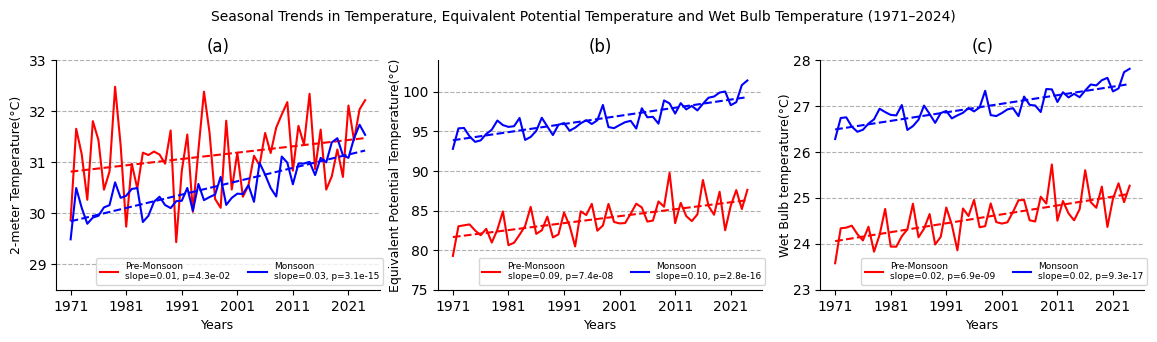

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12, 3.5))

season_list = ["Pre-Monsoon", "Monsoon", "Post-Monsoon"]
colors = ['red', 'blue', 'green']
years = np.arange(1971, 2024 + 1, 1)

for i in range(2):
    df = all_season_t2m[all_season_t2m['numeric_season'] == i + 2]
    trend_line,slope,p_value,significance_percentage=trend_calculation(df,'t2m')
    axs[0].plot(df.year, df.t2m, color=colors[i], label=f'{season_list[i]}\nslope={slope:.2f}, p={p_value:.1e}')  # Add label here
    axs[0].plot(df.year,trend_line, color=colors[i], linestyle='--')

axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].set_ylim(28.5,33)
axs[0].set_xticks(years[::10])
axs[0].set_title('(a)')

# Add legend here
axs[0].legend(loc='center',bbox_to_anchor=(0.567, 0.08), fontsize=6.5,ncol=3)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(axis='y',linestyle='--')
axs[0].set_xlabel('Years',fontsize=9)
axs[0].set_ylabel('2-meter Temperature(°C)',fontsize=9)

for i in range(2):
    df = all_season_ept[all_season_ept['numeric_season'] == i + 2]
    trend_line,slope,p_value,significance_percentage=trend_calculation(df,'ept')
    axs[1].plot(df.year, df.ept, color=colors[i],label=f'{season_list[i]}\nslope={slope:.2f}, p={p_value:.1e}')  # Add label here
    axs[1].plot(df.year,trend_line, color=colors[i], linestyle='--')

axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].set_ylim(75,104)
axs[1].set_xticks(years[::10])
axs[1].set_title('(b)')

axs[1].legend(loc='center',bbox_to_anchor=(0.567, 0.08), fontsize=6.5,ncol=3)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].grid(axis='y',linestyle='--')
axs[1].set_xlabel('Years',fontsize=9)
axs[1].set_ylabel('Equivalent Potential Temperature(°C)',labelpad=0,fontsize=9)


for i in range(2):
    df = all_season_wbt[all_season_wbt['numeric_season'] == i + 2]
    trend_line,slope,p_value,significance_percentage=trend_calculation(df,'wbt')
    axs[2].plot(df.year, df.wbt, color=colors[i],label=f'{season_list[i]}\nslope={slope:.2f}, p={p_value:.1e}')  # Add label here
    axs[2].plot(df.year,trend_line, color=colors[i], linestyle='--')

axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)
axs[2].set_ylim(23,28)
axs[2].set_xticks(years[::10])
axs[2].set_title('(c)')

axs[2].legend(loc='center',bbox_to_anchor=(0.567, 0.08), fontsize=6.5,ncol=3)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].grid(axis='y',linestyle='--')
axs[2].set_xlabel('Years',fontsize=9)
axs[2].set_ylabel('Wet Bulb temperature(°C)',labelpad=1,fontsize=9)

fig.suptitle('Seasonal Trends in Temperature, Equivalent Potential Temperature and Wet Bulb Temperature (1971–2024)',y=0.96, fontsize=10)
fig.tight_layout(pad=1.0)
plt.subplots_adjust( wspace=0.18)

plt.show()

In [ ]:
print('2m Temperature')
print('---------------------')

for i in range(3):
    df = all_season_t2m[all_season_t2m['numeric_season'] == i + 2]
    trend_line,slope,p_value,significance_percentage=trend_calculation(df,'t2m')

    print(df['season'][i],': ',f'slope={slope:.2f}',f'significance={significance_percentage:.2f}')
print('Equivalent potential temperature')
print('---------------------')
for i in range(3):
    df = all_season_ept[all_season_ept['numeric_season'] == i + 2]
    trend_line,slope,p_value,significance_percentage=trend_calculation(df,'ept')

    print(df['season'][i],': ',f'slope={slope:.2f}',f'significance={significance_percentage:.2f}')
print('Wet bulb temperature')
print('---------------------')
for i in range(3):
    df = all_season_wbt[all_season_wbt['numeric_season'] == i + 2]
    trend_line,slope,p_value,significance_percentage=trend_calculation(df,'wbt')

    print(df['season'][i],': ',f'slope={slope:.2f}',f'significance={significance_percentage:.2f}')



2m Temperature
---------------------
MAM :  slope=0.01 significance=95.71
JJAS :  slope=0.03 significance=100.00
ON :  slope=0.02 significance=100.00
Equivalent potential temperature
---------------------
MAM :  slope=0.09 significance=100.00
JJAS :  slope=0.10 significance=100.00
ON :  slope=0.10 significance=100.00
Wet bulb temperature
---------------------
MAM :  slope=0.02 significance=100.00
JJAS :  slope=0.02 significance=100.00
ON :  slope=0.02 significance=100.00
